# Avaliando o modelo criado

### Criando o modelo
- Nas últimas aulas, criamos o modelo abaixo

In [220]:
# Importando o pandas e a base
import pandas as pd
base = pd.read_excel("BaseInadimplencia.xlsx",sheet_name='treino')
teste = pd.read_excel("BaseInadimplencia.xlsx",sheet_name='teste')

In [221]:
base.head()

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0
2,-2.745822,-2.250098,0
3,-1.352205,-1.280924,0
4,-0.596639,-2.932358,0


In [222]:
teste.head()

,SaldoConta,SaldoInvestimento,Situacao
0,-1.992492,-4.158429,0
1,-3.306014,-4.261263,0
2,-2.027399,-3.370517,0
3,-1.214772,-1.177712,0
4,-3.757442,-2.849533,0


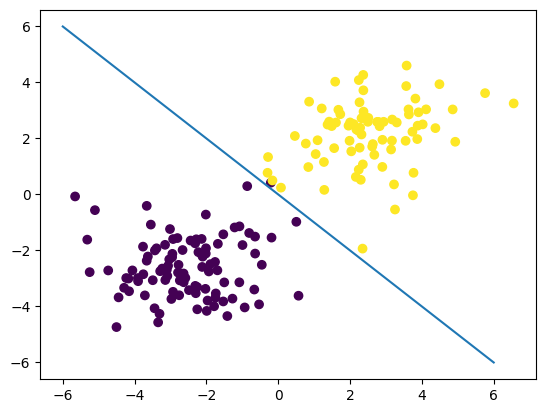

In [223]:
# Criando uma reta capaz de separar esses pontos
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# ax.scatter(base.SaldoConta, base['SaldoInvestimento'],c=base.Situacao)
ax.scatter(teste.SaldoConta, teste['SaldoInvestimento'],c=teste.Situacao)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

**Essa reta que separa os dados é dada por y=-x e tudo que estiver acima da reta deve ser classificado como 1 e tudo que estiver abaixo da reta como 0**

In [224]:
# Transformando essa reta em uma função para classificar os pontos
def clf(x,y):
    # y_modelo = -x_modelo
    y_modelo = -x

    # Se y_modelo > y_dado -> class: 0
    if y_modelo >= y:
        return 0
    # Se y_modelo < y_dado -> class: 1
    elif y_modelo < y:
        return 1

In [225]:
# Aplicando a função aos dados de treino
base['predict'] = base.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)
teste['predict'] = teste.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)

In [226]:
# Verificando a base com a nova coluna
base.head(2)

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.365390,-3.280278,0,0
1,-3.910816,-0.874096,0,0


In [227]:
teste.head(2)

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.992492,-4.158429,0,0
1,-3.306014,-4.261263,0,0


In [228]:
# Usar o groupby para o treino
base.groupby(['Situacao','predict'])['predict'].count()

Situacao  predict
0         0          444
1         1          378
Name: predict, dtype: int64

In [229]:
# Usar o groupby para o teste
teste.groupby(['Situacao','predict'])['predict'].count()

Situacao  predict
0         0          98
          1           1
1         1          79
Name: predict, dtype: int64

### Avaliando o modelo criado
- Para avaliar o modelo, vamos começar utilizando a matriz de confusão (confusion matrix)
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [230]:
from sklearn.metrics import confusion_matrix

In [231]:
# Matriz de confusão para a base de treino
confusion_matrix(base.Situacao,base.predict)

array([[444,   0],
       [  0, 378]], dtype=int64)

In [232]:
# Matriz de confusão para a base de teste
confusion_matrix(teste.Situacao,teste.predict)

array([[98,  1],
       [ 0, 79]], dtype=int64)

- Vamos calcular a acurácia
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [233]:
from sklearn.metrics import accuracy_score
# Acurácia para a base de treino
accuracy_score(base.Situacao,base.predict)

1.0

In [234]:
# Acurácia para a base de teste
accuracy_score(teste.Situacao,teste.predict)

0.9943820224719101

- E então vamos utilizar a precisão
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [235]:
from sklearn.metrics import precision_score
# Precisão para a base de treino
precision_score(base.Situacao,base.predict)

1.0

In [236]:
# Precisão para a base de teste
precision_score(teste.Situacao,teste.predict)

0.9875

- E o recall
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

In [237]:
from sklearn.metrics import recall_score
# Recall para a base de treino
recall_score(base.Situacao,base.predict)

1.0

In [238]:
# Recall para a base de teste
recall_score(teste.Situacao,teste.predict)

1.0